The following project targets the prediction of the weight of the fish based on different columns. The data set has been taken by kaggle and one can easily find it online.

In general, I will explain what I am going to do.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

data = pd.read_csv("fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [97]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

The column species is the only one which is non-numerical. Let's see what is included.

In [98]:
species_counts = data["Species"].value_counts().to_frame()
species_counts.reset_index(inplace=True)
species_counts.columns=["Species","Counts"]
species_counts

,Species,Counts
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


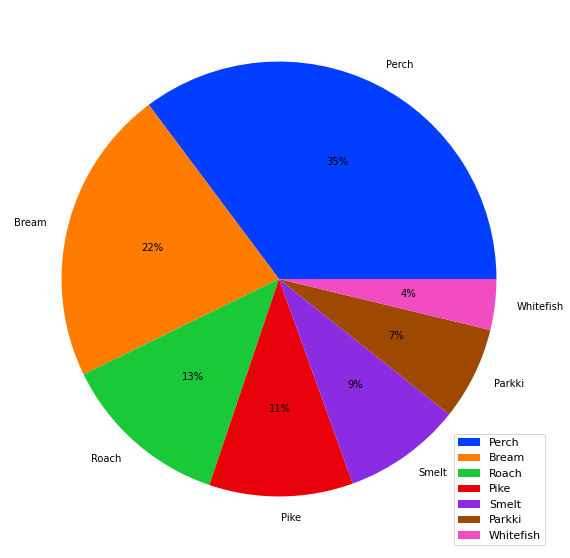

In [99]:
colors = sns.color_palette('bright')
y = species_counts.Counts
labels = species_counts.Species

ax, fig = plt.subplots(figsize=(15,10))
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(fontsize=11)
plt.show()

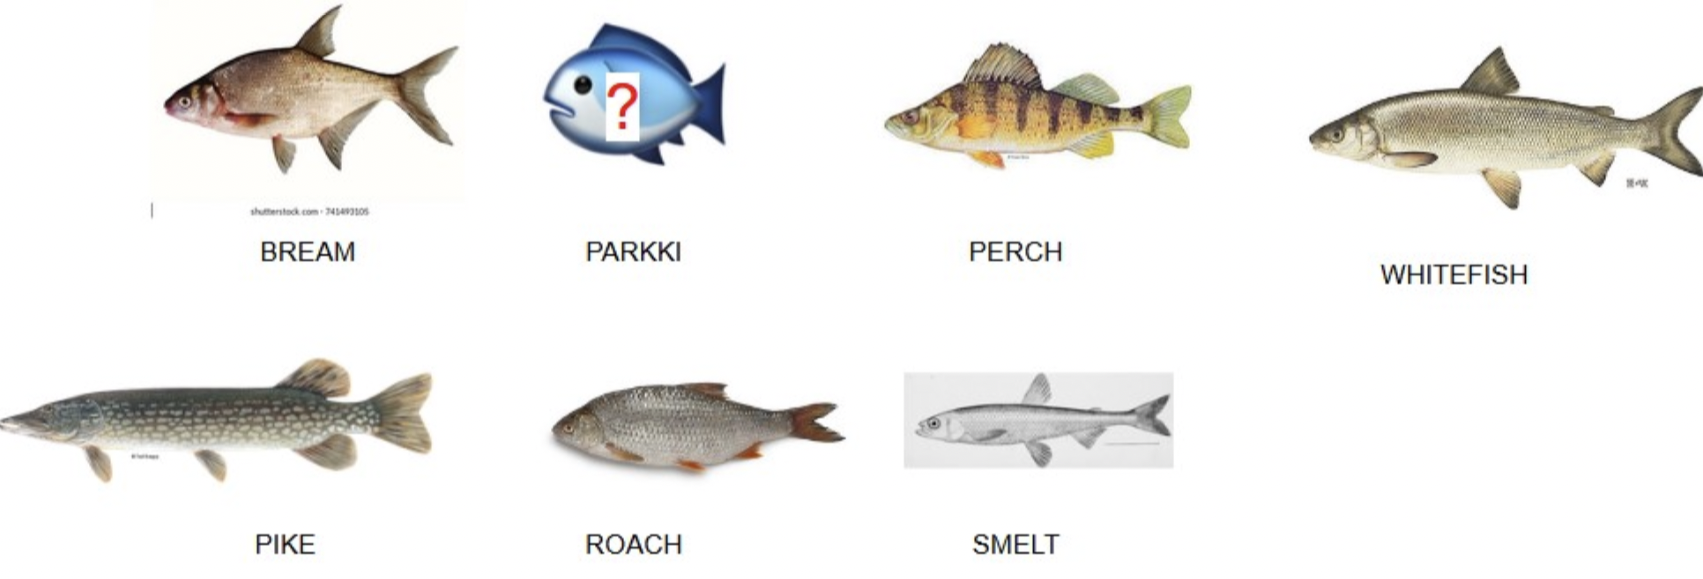

In [100]:
from IPython.display import Image
Image(filename='fish_spiecies.jpg') 

Based on the figure that I show above, one can see the specific fish spiecies and the respective percentage in the dataset, as it is depicted on the pie chart above the figure with the spiecies.
Interestingly, one can see that Perch appears first with 35% and Bream second with 22% (those two species are already over 50% of the sample) and whitefish is the last one with 4%.

Next, I will try to understand the other columns.

In [101]:
# Categorize the columns into numerical and categorical. Actually, only the column spiecies is categorical.

float_columns = list()
for i in range(len(data.columns)):
    if data.dtypes[i]!=np.object:
        float_columns.append(data.columns[i])
float_columns

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

#### Before I move on, let's see the the meaning of the columns:

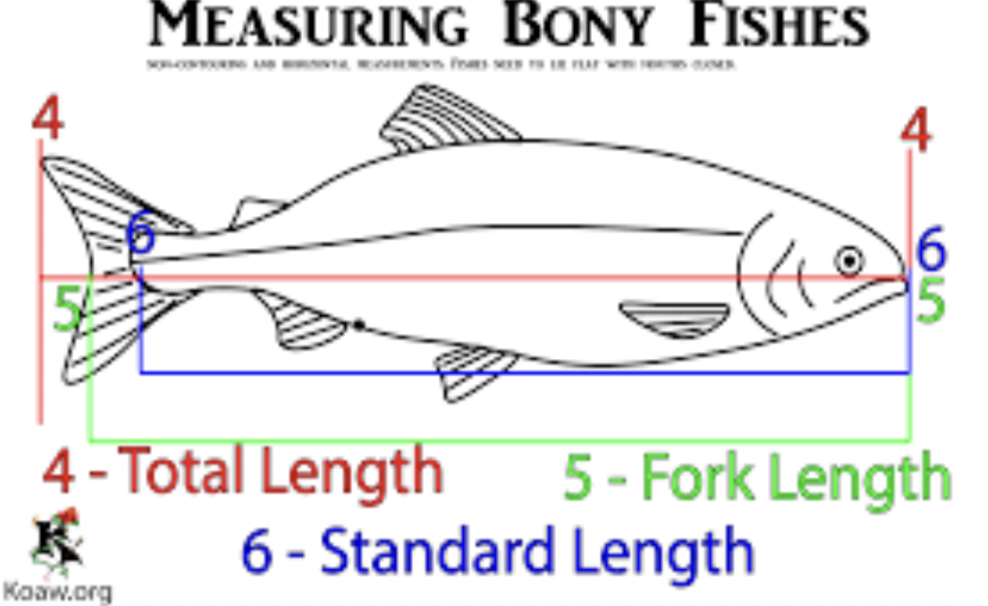

In [102]:
from IPython.display import Image
Image(filename='lengths.png') 

There are some different lengths (Standard, Fork and Total). I have:

* Length1: Standard Length; in cm
* Length2: Fork Length; in cm
* Length3: Total Length; in cm

I can rename those columns.

Other columns, such as Width, Height and Weight, won't be renamed. It is easy to understand one where do they refer to.

In [103]:
data.rename(columns={'Length1':'Standard Length', 'Length2':'Fork Length', 'Length3':'Total Length'}, inplace=True)
data

,Species,Weight,Standard Length,Fork Length,Total Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


##### I will plot the pair-plots to see possible correlation per column

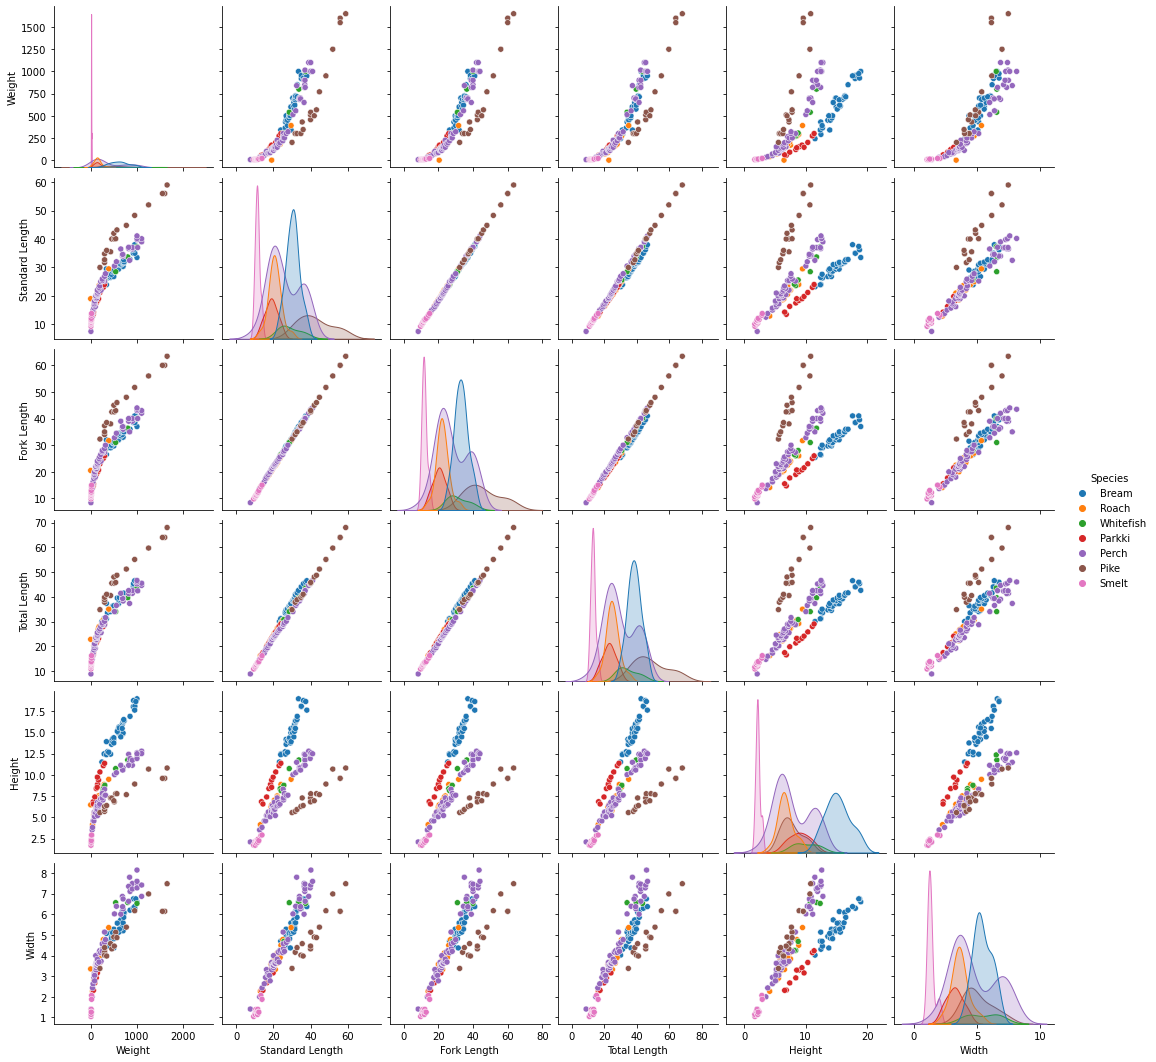

In [104]:
sns.pairplot(data, kind = 'scatter', hue='Species');

In general, I am interested in predicting the weight of the fish and from the first row (after the first column) it is obvious that I need **polynomial regression**. Nevertheless, I will test the linear regression as well.

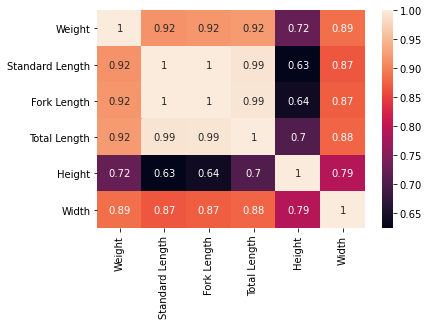

In [105]:
sns.heatmap(data.corr(), annot=True);

I want to check the percentages per column groubed by the Species. So, let's give a look...

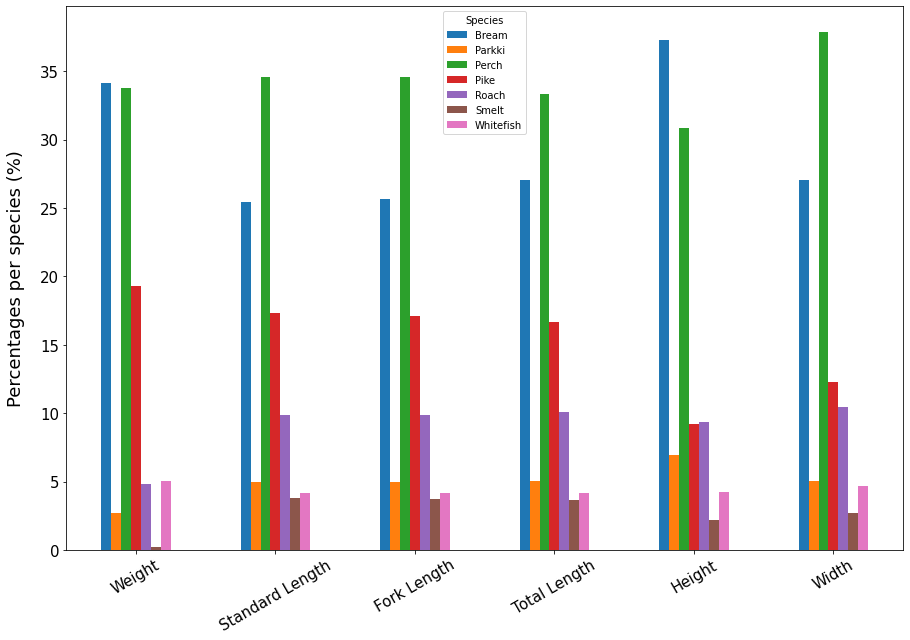

In [106]:
percents_df = (data.groupby(by='Species').sum()/data.groupby(by='Species').sum().sum())*100
percents_df.T.plot.bar(fontsize=15, figsize=(15,10))
plt.ylabel('Percentages per species (%)', fontsize=18, labelpad=15)
plt.xticks(rotation=30);

From the plot above one can see that the "king" fishes of the data set are Bream and Perch, something that I had already shown some cells above...let's give a look on the columns:

* Weight: from the total weight of all the fishes of the dataset, the lighter is the Smelt
* Standard/Fork/Total length: from the sum of each in all dataset, the longer in Smelt and shorter is Smelt
* Height: from the total sum of height in all dataset, the higher is Bream (second higher comes Perch), whereas the Smelt is the shorter
* Width: from the total sum of width in all data-set, the Perch is the widest while Smelt is the narrowest.

But the analysis above is in all of the data-set. And according to the species, 57% of the datas is mainly Perch and Bream...so, it is a bit unfair.
Let's see the boxplots:

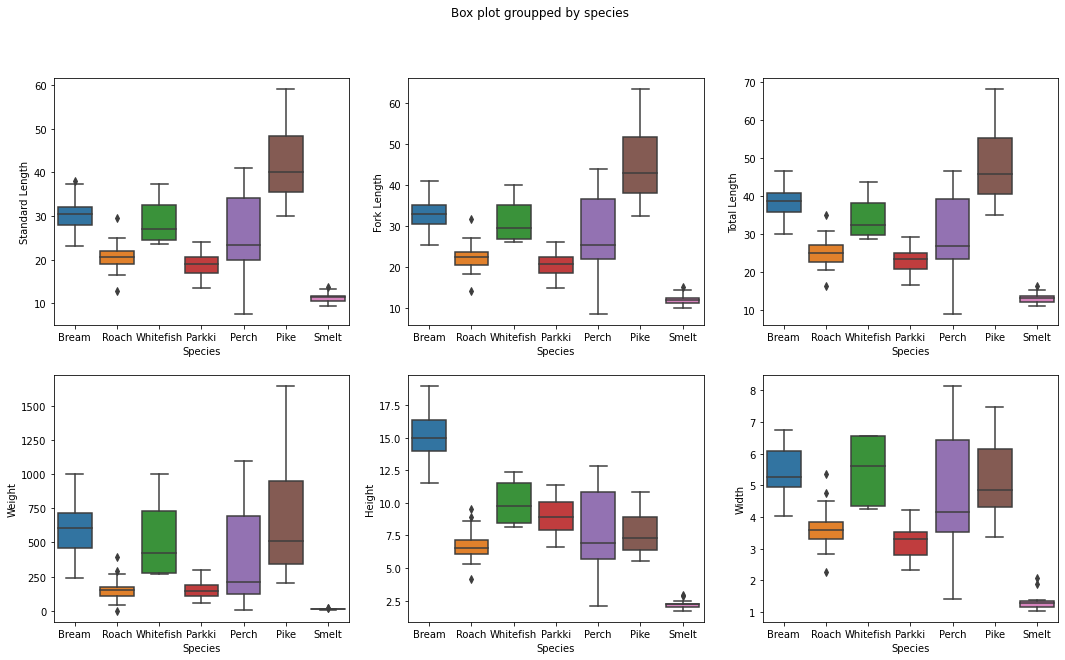

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Box plot groupped by species')

sns.boxplot(ax=axes[0, 0], data=data, x='Species', y='Standard Length')
sns.boxplot(ax=axes[0, 1], data=data, x='Species', y='Fork Length')
sns.boxplot(ax=axes[0, 2], data=data, x='Species', y='Total Length')
sns.boxplot(ax=axes[1, 0], data=data, x='Species', y='Weight')
sns.boxplot(ax=axes[1, 1], data=data, x='Species', y='Height')
sns.boxplot(ax=axes[1, 2], data=data, x='Species', y='Width');

From the boxplot we can see that Pike can be the longest from all availabel species, but due to the limitied sample it was not shown before.
Smelt remains the shortest ans narroest from all species.


### Now I am starting applying Regression techniques for the prediction of the weight of the fish

In the next step, I will apply Regression techniques in order to predict the weight of the fish based on the other columns. I will apply Linear, Lasso, Ridge for the linear case, but I must acually check the case of the Polynomial Features. I will also preprocess the data using different scaler methods. Firstly, I will split the data into train and test but in the next step I will apply the method of k-folds and cross-validation.

Firstly, I split the data into train and test set and I will apply the different preprocessing methods to find the appropriate alpha, which is a hyperparameter in Ridge and Lasso Regression, and then using the specific alpha I will continue with k-fold and cross-validation.

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

scaler = {'Standard Scaler':StandardScaler(),
          'Min-Max Scaler':MinMaxScaler(),
          'Max-Abs Scaler':MaxAbsScaler()}

regression = {'Lasso Regression':Lasso(max_iter=100000),
              'Ridge Regression':Ridge(max_iter=100000)}

X = data.drop(columns=['Species', 'Weight'])
y = data['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

score_train, score_test = list(), list()
alphas, predicted_values = list(), list()
method = list()
for key1, value1 in scaler.items():
    for key2, value2 in regression.items():
        
        estimator = Pipeline([('Scaler', value1), (key2,value2)])
        
        needed_key = key2 + '__alpha'
        parameter = {needed_key:np.geomspace(1e-05,10,10)}
        
        grid = GridSearchCV(estimator, parameter)        
        grid.fit(X_train,y_train)
        
        y_predict = grid.predict(X_test)
        predicted_values.append(grid.predict(X))
        score = r2_score(y_test, y_predict)
        
        method.append(key1 + '-' + key2)
        alphas.append(list(grid.best_params_.items())[0][1])
        score_train.append(grid.best_score_)
        score_test.append(score)
        
        print(key1,':',grid.best_score_, grid.best_params_, score)
        print('Coefficients', ':', grid.best_estimator_.named_steps[key2].coef_)
        print('Intercept', ':', grid.best_estimator_.named_steps[key2].intercept_)
        print('-'*100)

Standard Scaler : 0.8618274849816261 {'Lasso Regression__alpha': 2.154434690031882} 0.8664413357970123
Coefficients : [249.09239542   1.12681226   0.          40.80436251  65.24899343]
Intercept : 401.10720720720735
----------------------------------------------------------------------------------------------------
Standard Scaler : 0.8644677868052344 {'Ridge Regression__alpha': 10.0} 0.869412329209425
Coefficients : [88.08624644 86.67643564 70.67646789 32.03930777 70.92558944]
Intercept : 401.10720720720724
----------------------------------------------------------------------------------------------------
Min-Max Scaler : 0.8618906155902522 {'Lasso Regression__alpha': 0.46415888336127725} 0.8669789024531208
Coefficients : [1278.47829964    5.18328726    0.          170.24299394  272.38326944]
Intercept : -279.9210223946518
----------------------------------------------------------------------------------------------------
Min-Max Scaler : 0.8644310808417618 {'Ridge Regression__alpha'

In [109]:
test_list = list(zip(method, alphas, score_train, score_test))
pd.DataFrame(test_list, columns = ['Method', 'alphas', 'Score Train-set', 'Score Test-Set'])

,Method,alphas,Score Train-set,Score Test-Set
0,Standard Scaler-Lasso Regression,2.154435,0.861827,0.866441
1,Standard Scaler-Ridge Regression,10.000000,0.864468,0.869412
2,Min-Max Scaler-Lasso Regression,0.464159,0.861891,0.866979
3,Min-Max Scaler-Ridge Regression,0.464159,0.864431,0.871655
4,Max-Abs Scaler-Lasso Regression,0.464159,0.861930,0.867177
5,Max-Abs Scaler-Ridge Regression,0.464159,0.864601,0.873593


Based on the dataframe above, one can see that the best option is the last one, using Max-Abs Scaler and Ridge Regression.Nevertheless, all gives results close to that one, so also the other could be.

Before I move on, I would like to check the plots of "predicted values vs real values".

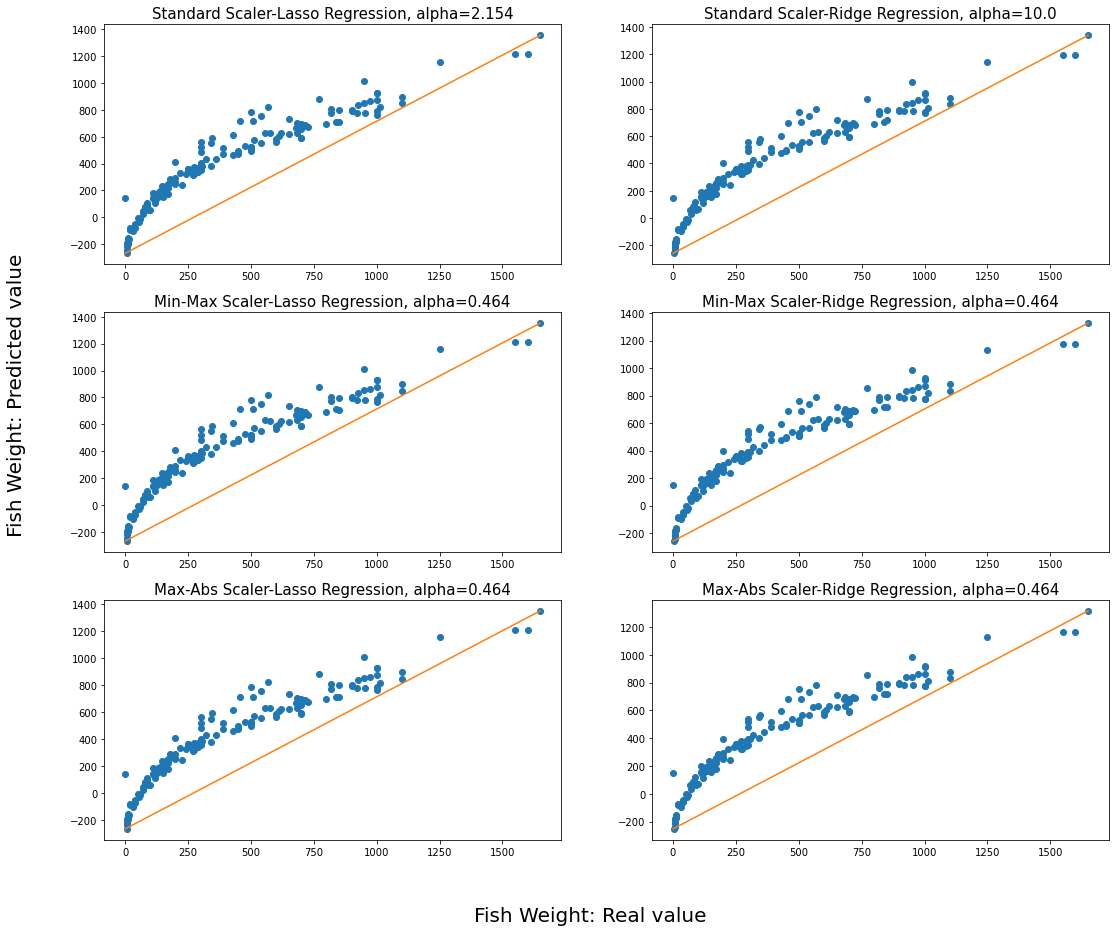

In [110]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
ax = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1]]

for i in range(6):
    ax[i].plot(y, predicted_values[i],'o')
    ax[i].plot([min(y),max(y)], [min(predicted_values[i]),max(predicted_values[i])], '-')
    ax[i].set_title(method[i]+', alpha='+str(round(alphas[i],3)), fontsize=15)

fig.text(0.05, 0.41,'Fish Weight: Predicted value', rotation=90, fontsize=20)
fig.text(0.41, 0.05,'Fish Weight: Real value', fontsize=20);

Obviously, it is not the best results...anyway...

Nextly, I will do the same, but I will apply it on the scaler of Polynomial Feature only with a degree until 3, by using again Ridge and Lasso regressions.

In [111]:
from sklearn.preprocessing import PolynomialFeatures


score_train_pf, score_test_pf = list(), list()
alphas_pf, predicted_values_pf = list(), list()
method_pf = list()
for key1, value1 in scaler.items():
    for key2, value2 in regression.items():    
        
        estimator = Pipeline([('Scaler', value1), 
                              ('Polynomial Feature', PolynomialFeatures()), 
                              (key2,value2)])
        
        needed_key = key2 + '__alpha'
        
        parameter = {'Polynomial Feature__degree':[1,2,3,4,5], needed_key:np.geomspace(1e-05,10,10)}
        
        grid = GridSearchCV(estimator, parameter)
        grid.fit(X_train,y_train)
        
        y_predict = grid.predict(X_test)
        predicted_values_pf.append(grid.predict(X))
        score = r2_score(y_test, y_predict)
        
        method_pf.append(key1 + '-' + key2)
        alphas_pf.append(list(grid.best_params_.items())[0][1])
        score_train_pf.append(grid.best_score_)
        score_test_pf.append(score)
        
        print(key1,':',grid.best_score_, grid.best_params_, score)
        print('Coefficients', ':', grid.best_estimator_.named_steps[key2].coef_)
        print('Intercept', ':', grid.best_estimator_.named_steps[key2].intercept_)
        print('-'*100)

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79963.52262188894, tolerance: 1208.2645734545456
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64134.47339237408, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94716.43235916924, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36064.3980149866, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55876.176950277564, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36482.08516166113, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36593.894871713266, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22165.0212475598, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36463.83067793519, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13686.84929826453, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26895.18911957355, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19280.421488152955, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21772.667354415385, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3003.073438380481, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16939.87633061455, tolerance: 1208.2645734545456
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site

Standard Scaler : 0.9793092433451429 {'Lasso Regression__alpha': 0.1, 'Polynomial Feature__degree': 3} 0.9737692462234345
Coefficients : [   0.            3.61769225  139.13884858   -0.           54.81895975
  148.44717549   -0.           -0.           -0.           29.56149246
   19.47504116   -0.           -0.            0.           76.69701952
  -20.6755426    -0.            0.           26.75209462    0.
   -8.71627683    0.           12.07243165    0.            0.
   -0.           19.8852497     0.            0.           -0.
    0.            0.           -0.           -0.            0.
   -0.           17.20056868    0.            0.           -0.
    0.            0.          -12.96031938   -7.60351972    0.
   -2.78060915    0.           33.04747238  -74.85574049    0.
    0.           -0.           13.85930227 -105.85670201  143.49050192
  -27.21017225]
Intercept : 293.35764603862526
-------------------------------------------------------------------------------------------

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80099.45106126029, tolerance: 1208.2645734545456
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66476.82865411368, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97717.24908545434, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38790.330856463035, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60061.26869886241, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36757.372415701015, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34320.070814621475, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21953.558011201876, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33835.37781435039, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9657.00417725907, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20020.56167676275, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1605.0482420210028, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

Min-Max Scaler : 0.9807977276692682 {'Lasso Regression__alpha': 0.001, 'Polynomial Feature__degree': 4} 0.9729832086278551
Coefficients : [ 0.00000000e+00  0.00000000e+00  6.83753117e+01  1.10990028e+01
  7.61572674e+02 -3.21255308e+02 -3.07706123e+02 -0.00000000e+00
 -3.07434871e+02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.89059490e+02 -7.87817239e+02
 -3.72578663e+03  4.24031027e+03 -2.04189426e+03 -1.58123151e+02
 -2.03755473e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.87306549e+02  0.00000000e+00
  4.71119037e+02  2.71834411e+02  0.00000000e+00 -0.00000000e+00
  3.91649092e+02  3.54666093e+03  4.37224402e+03  0.00000000e+00
  4.97253741e+01  0.00000000e+00  9.44738372e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.46393407e+02  0.00000000e+00 -8.38245244e+02 -1.96869491e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.51702610e+02
  4.81386566e+03 

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81049.83323437169, tolerance: 1208.2645734545456
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67801.84976519231, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99516.70372542868, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-p

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42679.367157746914, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62874.81544490548, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39270.93759923379, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48484.76035010839, tolerance: 1113.175357752809
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31382.502298865944, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45844.52329766914, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6429.745510014858, tolerance: 1152.0104152359552
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10788.295829881907, tolerance: 1255.5784681797754
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075.1625769323582, tolerance: 1010.1295902022472
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/sit

Max-Abs Scaler : 0.9809374293994295 {'Lasso Regression__alpha': 0.001, 'Polynomial Feature__degree': 4} 0.9738462894862238
Coefficients : [ 0.00000000e+00  9.95144885e+01  1.56083487e+02  3.22781991e+01
  1.33601041e+03 -9.22548833e+02 -2.78861779e+03 -0.00000000e+00
 -2.42292928e+02 -9.84386720e+02  1.97200976e+03  0.00000000e+00
 -0.00000000e+00 -2.03417436e+02  4.73815117e+02 -2.90346290e+02
 -5.27499034e+03  5.30372827e+03 -2.40617621e+03 -0.00000000e+00
 -4.93370533e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.38455627e+03  8.19490524e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.95751807e+02  0.00000000e+00  0.00000000e+00
  6.28741963e+02  4.79261376e+03  2.64694873e+03  5.86899571e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.49365284e+01  0.00000000e+00 -1.32434186e+03 -1.20623008e+03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.86761862e+02
  6.36781456e+03 

In [115]:
test_list_pf = list(zip(method_pf, alphas_pf, score_train_pf, score_test_pf))
pd.DataFrame(test_list_pf, columns = ['Method', 'alphas', 'Score Train-set', 'Score Test-Set'])

,Method,alphas,Score Train-set,Score Test-Set
0,Standard Scaler-Lasso Regression,0.100,0.979309,0.973769
1,Standard Scaler-Ridge Regression,3.000,0.978935,0.973857
2,Min-Max Scaler-Lasso Regression,0.001,0.980798,0.972983
3,Min-Max Scaler-Ridge Regression,5.000,0.983383,0.976018
4,Max-Abs Scaler-Lasso Regression,0.001,0.980937,0.973846
5,Max-Abs Scaler-Ridge Regression,5.000,0.982353,0.976112


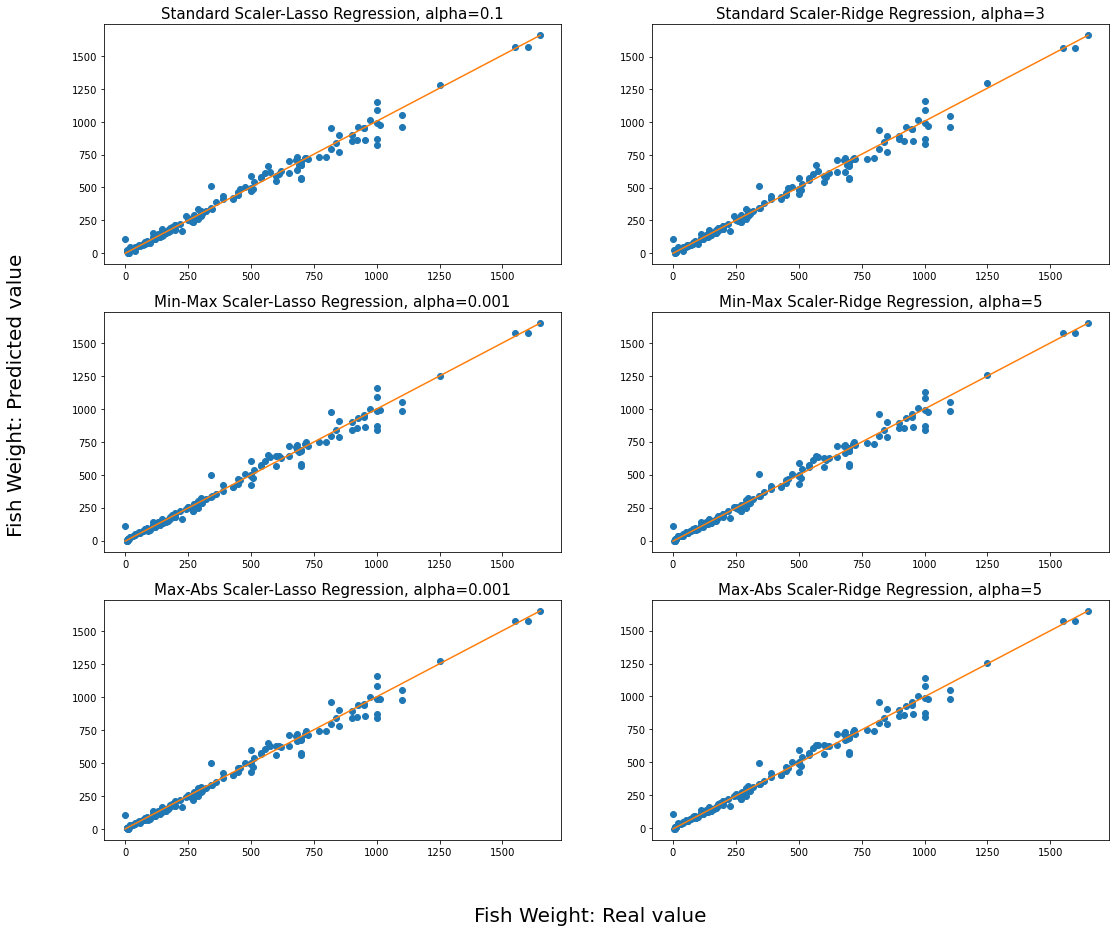

In [116]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
ax = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1]]

for i in range(6):
    ax[i].plot(y, predicted_values_pf[i],'o')
    ax[i].plot([min(y),max(y)], [min(predicted_values_pf[i]),max(predicted_values_pf[i])], '-')
    ax[i].set_title(method_pf[i]+', alpha='+str(round(alphas_pf[i],3)), fontsize=15)

fig.text(0.05, 0.41,'Fish Weight: Predicted value', rotation=90, fontsize=20)
fig.text(0.41, 0.05,'Fish Weight: Real value', fontsize=20);

### What one can understand from the results until now:

* For scaler I can use MaxAbsScaler (even if the difference is really small with the others)
* I must use PolynomialFeatures (it was obvious from the pairplot some plots above), where the algorithm found for Lasso degree=4 and for Ridge degree=5. I will keep for the next step degree=4.
* alphas for the regressions, Lasso: 0.001, Ridge: 5.000  

Now I can continue with the k-fold technique, and include Linear Regression.
Firstly, I will check the result of the R^2 per regression and per Fold. 
In the second step, I will simply use the cross-validation technique in order to see the difference to the previous.

In [138]:
#alphas
alpha_ridge, alpha_lasso = 5, 0.001

#scaler
s = MaxAbsScaler()

#PolynomialFeatures
pf =PolynomialFeatures(degree = 5)

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression

#K-Folds, I will split the data-set into three 
k_folds = KFold(shuffle=True, random_state = 72018, n_splits=3)

#regressions, I have added the Linear regression and I give the specific values for alpha hyperparameter to Lasso and Ridge regression
# I also increase the maximum number of iteration steps
regressions = {'Linear Regression':LinearRegression(),
               'Lasso Regression':Lasso(alpha = alpha_lasso, max_iter = 500000),
               'Ridge Regression':Ridge(alpha = alpha_ridge, max_iter = 500000)}

#############################
#######  First Step  ########
#############################
scores_step_1 = list()
for key, value in regressions.items():
    
    estimator = Pipeline([('Scaler', s),
                          ('Polynomial regression', pf),
                          ('Regression method', value)])
    
    score_per_regression = list()
    
    for train, test in k_folds.split(X):
        
        X_train, X_test, y_train, y_test = X.iloc[train, :], X.iloc[test, :], y[train], y[test]
        X_train_s, X_test_s = s.fit_transform(X_train), s.transform(X_test)
        value.fit(X_train_s, y_train)
        y_pred = value.predict(X_test_s)
        score = r2_score(y_test,y_pred)
        score_per_regression.append(score)


    scores_step_1.append(score_per_regression)
    

##############################
#######  Second Step  ########
##############################
scores_step_2 = list()
for key, value in regressions.items():
    
    estimator = Pipeline([('Scaler', s),
                          ('Polynomial regression', pf),
                          ('Regression method', value)])
    
    predictions = cross_val_predict(estimator, X, y, cv=k_folds)
    score = r2_score(y,predictions)
    scores_step_2.append(score)

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3268.808256559103, tolerance: 1416.738160009434
  model = cd_fast.enet_coordinate_descent(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6179.721717401655, tolerance: 1464.629468226415
  model = cd_fast.enet_coordinate_descent(


I will the score results into an order by regression and folds/cross-validation, and I will create a DataFrame.

In [145]:
score_linear, score_lasso, score_ridge = list(), list(), list()

for i in range(len(scores_step_1)):

    score_linear.append(scores_step_1[i][0])
    score_lasso.append(scores_step_1[i][1])
    score_ridge.append(scores_step_1[i][2])
    
score_linear.append(scores_step_2[0])
score_lasso.append(scores_step_2[1])
score_ridge.append(scores_step_2[2])
        
        
final_scores = list(zip(score_linear, score_lasso, score_ridge))
final_scores = pd.DataFrame(final_scores, columns = ['Linear Regression', 'Lasso Regression', 'Ridge Regression'])
final_scores.rename(index={0: 'Fold-1', 1: 'Fold-2', 2: 'Fold-3', 3:'Cross Validation'}, inplace=True)
final_scores

,Linear Regression,Lasso Regression,Ridge Regression
Fold-1,0.834712,0.850656,0.880164
Fold-2,0.834874,0.850580,0.880198
Fold-3,0.891910,0.713680,0.840809
Cross Validation,-5499.364032,0.973447,0.953857


The DataFrame shows that cross-validation gives very good results (no explanation for Linear Regression) and for different k-folds the result is lower.

# Conclusions

I used a dataset which includes different species of fish and for each case weight, widht, height, Standard/Fork/Total length. I have shown a figure with the different species and one more figure that explains the meaning of the columns on the fish.

**The target is to calculate the weight of the fish**, independent of the specie. Although I made some data analysis and I started with the pairplot to see correlations. Apparently, Standard/Fork/Total length have a linear correlation and for the weight there is a polynomial regression. 

The species that dominate in the dataset are Bream and Perch. One can think that they are 'hugest' species, although the boxplot shows that the largest specie is Pike. Bream and Perch have 57% of the datas whereas Pike only 11%, and this is the explanation for this misunderstanding.

Next, I apply some regression techniques using GridSearchCV to find the optimal parameters. From the results, we see that we can use Lasso regression with alpha=0.001 and polynomial regression (degree=4).